This is an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether a user clicked on an ad based off the features of that user.

# **Business Question**

To predict whether or not a particular internet user clicked on an Advertisement

This is a **Classification Problem** which will require the use of *Logistic Regression Model* or *KNN Model* for prediction.

The following rubric will be followed to answer the business question:

*   Environment Set Up (Load required libraries)
*   Data Acquisition
*   Data Wrangling
*   EDA (Exploratory Data Analysis) - Plots, Graphs
*   Model Building
*   Model Evaluation
*   Summary and Conclusion

# **Environment Setup**

In [ ]:
import pandas as pd

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot 

# **Data Acquisition**

Read in the advertising.csv file from github account and load it into a dataframe called "advt"

In [ ]:
advt = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/advertising.csv')

# **Data Wrangling / Exploratory Data Analysis**

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
import pandas_profiling as pp

In [ ]:
pp.ProfileReport(advt)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Our data contains *1000 observation(rows)*  and *10 variables (columns)* and has *no null values*.

The average age for users is between 36 and 37 years with the median age as 35.

Most internet users are within 19 and 40 years. Additonally, non-male internet users are slighty higher than males.

Our **Target Variable** (y) will be "*Clicked on Ad*", and it is of type boolean.

There exists a linear relationship between *Daily Time Spent on the Internet* and *Daily Internet Usage.* It clearly indicates that the more a user stays online, the more they consume internet resources.

We also observe that the data has some Categorical Objects (4 in total). For purposes of this exercise, we will drop these Categorical data as we will use only numeric values for Machine Learning.

In [ ]:
#Let us drop the inputs variables that we identified as Categorical
advt.drop(['Ad Topic Line', 'City','Country','Timestamp'], axis=1, inplace=True)

# **ML - Using Logistic Regression**

*  Model Building
*  Model Evaluation
*  Summary and Conclusion

From the **Frequency Table** section for "**Clicked on Ad**", we observe that our Target  varianble is balanced. This is very useful in ensuring our model works well.

**SPLIT DATA INTO TRAINING AND TEST SETS**

In [ ]:
#Use SKLEARN PACKAGE
from sklearn.model_selection import train_test_split

In [ ]:
#We drop the Target Variable "Clicked on Ad"
X_train, X_test, y_train, y_test = train_test_split(advt.drop('Clicked on Ad', axis=1), advt['Clicked on Ad'], test_size = 0.30, random_state = 101)

In [ ]:
#fit a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict=logmodel.predict(X_test)

**Classification Report**

In [ ]:
#Let us import the classification model
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



We observe that our Model has an accuracy of 93%.

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[149   8]
 [ 14 129]]


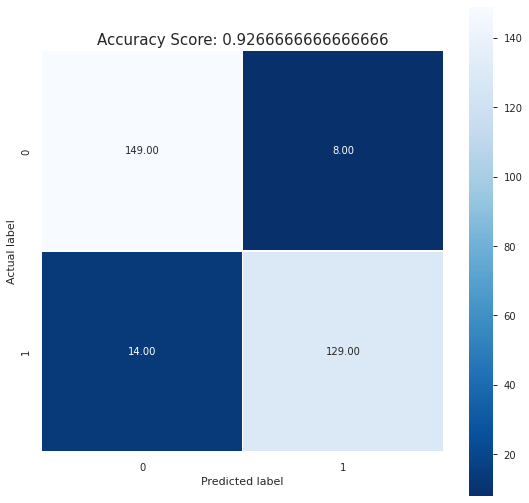

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

**EVALUATION**

2A.Our precision value for target class 1 is 0.94 (129/137) which indicates 94% prediction of True Positives.

2B. Our recall value for target class 1 is 0.90 (129/143) indicates a 90% sensitivity, which tells how often an internet user will click on an Ad. Our recall gives an understanding of how effective our model is at identifying any positive case that is present (because a false negative is actually a positive)

3A. Our precision value for target class 0 is 0.91, which indicates a True Negative of 91%

3B. Our recall value for target class 0 is 0.95 (95%) tell how often an internet user will not click on an Ad

# **ML - Using KNN**

We will standardize our data and drop the "Click on Ad" Target Variable.

In [ ]:
#Let's first create a copy of the dataframe
advt2 = pd.DataFrame(advt)

In [ ]:
advt2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


The KNN classifier predicts the class of a given test observation by identifying the observations nearest to it. Thus the scale of the variable matters. 
Any variable on a large scale will have a much larger effect on the distance between the observations and the KNN Model than variables on a small scale. 
We will therfore standardize all of our values using the StandardScaler function. 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
scalar.fit(advt2.drop('Clicked on Ad', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scalar.transform(advt2.drop('Clicked on Ad', axis=1))

Let's define our features and call it std_data

In [ ]:
std_data=pd.DataFrame(scaled_features,columns=advt2.columns[:-1])

In [ ]:
#Let's verify our features after applying the StandardScaler
std_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


**Model Building**

In [ ]:
#Import train_test_split from Python's sklearn library.
from sklearn.model_selection import train_test_split

In [ ]:
#We will split our dataset into 30 and 20.
x_train, x_test, y_train, y_test = train_test_split(scaled_features, advt2['Clicked on Ad'], test_size = .30)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 5)
(300, 5)
(700,)
(300,)


**K Value and Accuracy**

**We will run a code snippet to determine the optimal values of K which will yield the maximum accuracy score. This will then be used for the Model.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import numpy as np

In [ ]:
from sklearn import metrics

In [ ]:
#Declare an array called score
score=[] 

In [ ]:
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
  print(score)

[0.9466666666666667, 0.95, 0.95, 0.9566666666666667, 0.9533333333333334, 0.9533333333333334, 0.96, 0.9533333333333334, 0.96, 0.9666666666666667, 0.9633333333333334, 0.96, 0.9633333333333334, 0.96, 0.9633333333333334, 0.96, 0.9633333333333334, 0.9633333333333334, 0.96, 0.96, 0.96, 0.9633333333333334, 0.96, 0.9633333333333334, 0.9633333333333334, 0.9633333333333334, 0.9633333333333334, 0.9666666666666667, 0.9633333333333334, 0.9633333333333334, 0.9633333333333334, 0.96, 0.9633333333333334, 0.96, 0.9633333333333334, 0.9666666666666667, 0.9666666666666667, 0.9633333333333334, 0.96, 0.96, 0.96, 0.9566666666666667, 0.96, 0.9566666666666667, 0.96, 0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9566666666666667]


Text(0, 0.5, 'Accuracy Score')

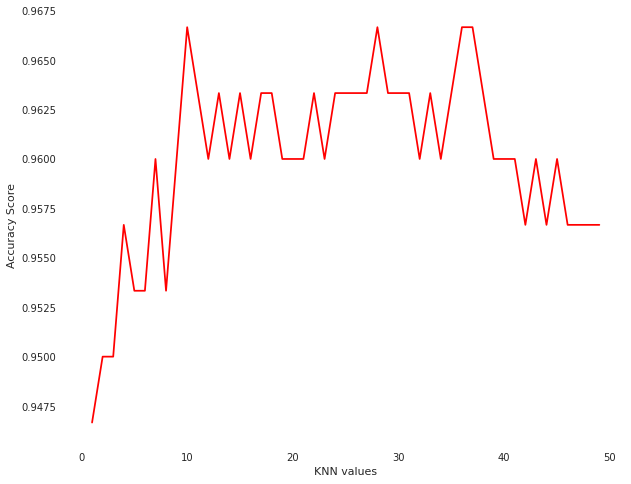

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), score, color='red')
plt.xlabel('KNN values') # Define the x-axis label
plt.ylabel('Accuracy Score') # Define the y-axis label

We observe from the figure plot that a K value of 10 or 28 or 36 or 37 can be used for the model to generate a high accuracy score. K plateaus at 36 and 37 and begins to drop in accuracy thereafter.

# Error rate and K Value

In [ ]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

(Text(0, 0.5, 'Eror Rate'),)

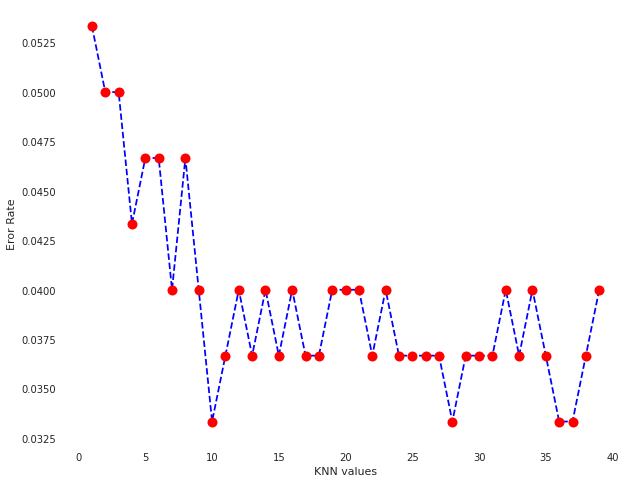

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
plt.xlabel('KNN values')
plt.ylabel('Eror Rate'),

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[145,   1],
       [  9, 145]])

In [ ]:
score = knn.score(x_test,y_test)

In [ ]:
score

0.9666666666666667

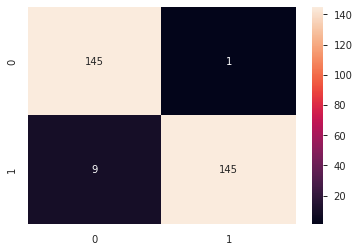

In [ ]:
sns.heatmap(cm, annot=True,fmt='0.0f')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       146
           1       0.99      0.94      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



**EVALUATION**

1.The accuracy of our model is 97%.

2A.Our precision value for target class 1 is 0.99 (145/146) which indicates 99% prediction of True Positives.

2B. Our recall value for target class 1 is 0.94. This indicates a 94% sensitivity, which tells how often an internet user will click on an Ad when predicted as such.

3A. Our precision value for target class 0 is 0.94 which indicates a True Negative of 94%

3B. Our recall value for target class 0 is .99 (99%) and tell how often an internet user will not click on an Ad when predicted as such.

#**Summary and Conclusion**

Our KNN model seems to perform better with the use of the StandardScaler and the right determination of the optimal K-Value.

From both Models, it can be concluded that there is a 93% (Logistic Regression) or 97% (KNN) chance of an internet user clicking on an Ad whiles usign the internet.

An inference can be deduced to place more Ads on webpages as users are likely to click on them during time spent on the internet. By extenstio this would boost marketing and sales for companies whose products/events are advertised.

# **Limitations**


More Data could be acquired to strenghten the Accuracy and robustness of the Model.

Countries could be grouped into continents to give an understanding of internet penetration and other statistics per continent.

